# Heart Disease

>Heart disease is the leading cause of death in the United States, according to the Centers for Disease Control and Prevention (CDC) . In the United States, 1 in every 4 deaths in is the result of a heart disease. That's about 610,000 people who die from the condition each year. Heart disease doesn't discriminate.The genral cause of heart failure is showhin the below picture
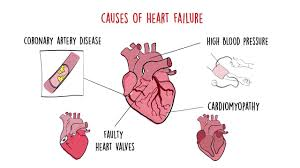                                                                
February is heart disease month in the US, and if you're not living in a bubble, you hear–over and over again–that nearly half of all Americans are suffering from some type of heart disease, be it high cholesterol, plaque blockages in their arteries, high blood pressure, or an elevated risk of heart attack or store.
  >>-Picture and Data courtesy Google.| https://www.google.co.in/imghp?hl=en&tab=wi&authuser=0&ogbl

Read More: Why You Need to Care About Heart Disease, Even If You're Healthy | https://thebeet.com/why-you-should-care-about-heart-health-even-if-you-dont-have-heart-disease/?utm_source=tsmclip&utm_medium=referral

>Our analysis consists of dataset which has 14 attributes. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

## Attributes used:
1. age
2. sex
3. cp- chest pain type (4 values)
4. trestbps- resting blood pressure
5. chol- serum cholestoral in mg/dl
6. fbs- fasting blood sugar > 120 mg/dl
7. restecg- resting electrocardiographic results (values 0,1,2)
8. thalach- maximum heart rate achieved
9. exang- exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca- number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


### We will start our Analysis in importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heartdisease_data.csv",na_values="?" )
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


# EDA
 WE WILL FIND THE NULL VALUES IN THE DATASET

In [3]:
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                    56
chol                         7
fbs                          7
restecg                      0
thalach                     53
exang                       53
oldpeak                     56
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

### There is a huge amount of data is missing in each column lets figure out how to resolve NaN. 
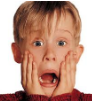


#### Lets find the unique values in each columns.

In [4]:
collist = df.columns.values

for i in collist:
    print(f"the unique value of {i} is \n {df[i].unique()}\n")


the unique value of age is 
 [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]

the unique value of sex is 
 [1 0]

the unique value of cp is 
 [4 3 2 1]

the unique value of trestbps is 
 [140. 130. 132. 142. 110. 120. 150. 180. 160. 126.  nan 128. 170. 152.
 116. 124.   0. 122. 144. 154. 125. 104. 136. 134. 138. 178. 146. 135.
 158. 106. 112. 102.  96. 172. 155. 156. 118. 100. 190. 114. 127.]

the unique value of chol is 
 [260. 209. 218. 228. 213.   0. 236. 267. 166. 220. 177. 186. 100. 171.
 230. 281. 203. 277. 233. 240. 153. 224. 316. 311. 270. 217. 214. 252.
 339. 216. 276. 458. 241. 384. 297. 248. 308. 208. 227. 210. 245. 225.
 198. 195. 161. 258. 235. 305. 223. 282. 349.  nan 160. 312. 283. 142.
 211. 306. 222. 202. 197. 204. 274. 192. 298. 272. 200. 261. 181. 221.
 175. 219. 310. 232. 273. 182. 292. 289. 193. 170. 369. 173. 271. 244.
 285. 243. 237. 165. 287. 256. 264. 226. 207. 284. 337. 254. 300. 333.
 139

In [5]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["chol"] = tpa_0["chol"].fillna(tpa_0["chol"].mean())
tpa_1["chol"] = tpa_1["chol"].fillna(tpa_1["chol"].mean())
tpa_2["chol"] = tpa_2["chol"].fillna(tpa_2["chol"].mean())
tpa_3["chol"] = tpa_3["chol"].fillna(tpa_3["chol"].mean())
tpa_4["chol"] = tpa_4["chol"].fillna(tpa_4["chol"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

In [6]:
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                    56
chol                         0
fbs                          7
restecg                      0
thalach                     53
exang                       53
oldpeak                     56
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

In [7]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["fbs"] = tpa_0["fbs"].fillna(tpa_0["fbs"].mean())
tpa_1["fbs"] = tpa_1["fbs"].fillna(tpa_1["fbs"].mean())
tpa_2["fbs"] = tpa_2["fbs"].fillna(tpa_2["fbs"].mean())
tpa_3["fbs"] = tpa_3["fbs"].fillna(tpa_3["fbs"].mean())
tpa_4["fbs"] = tpa_4["fbs"].fillna(tpa_4["fbs"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

In [8]:
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                    56
chol                         0
fbs                          0
restecg                      0
thalach                     53
exang                       53
oldpeak                     56
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

### we have divided target variable into catorigies and filled the NaN values with mean of "fbs" and "chol" lets deside further on seeing the correlation of the Dataset

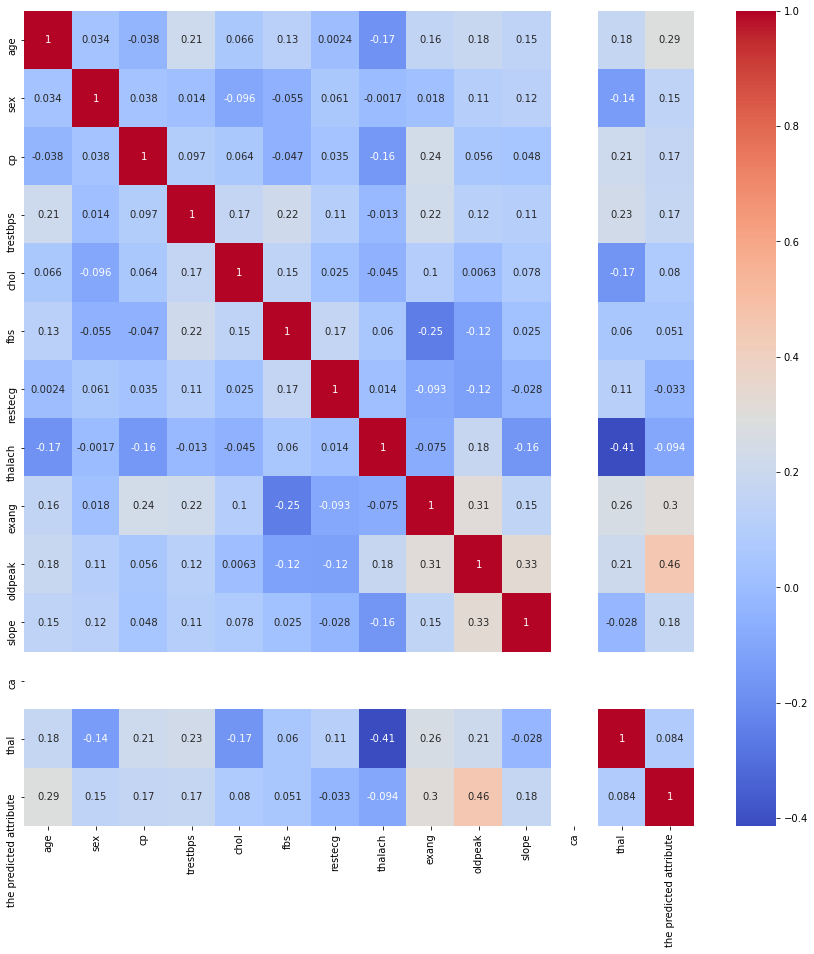

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

### "oldpeak" have 46% correlation on "the predicted attribute" so as like previous method we will fill NaN values

In [10]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["oldpeak"] = tpa_0["oldpeak"].fillna(tpa_0["oldpeak"].mean())
tpa_1["oldpeak"] = tpa_1["oldpeak"].fillna(tpa_1["oldpeak"].mean())
tpa_2["oldpeak"] = tpa_2["oldpeak"].fillna(tpa_2["oldpeak"].mean())
tpa_3["oldpeak"] = tpa_3["oldpeak"].fillna(tpa_3["oldpeak"].mean())
tpa_4["oldpeak"] = tpa_4["oldpeak"].fillna(tpa_4["oldpeak"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

In [11]:
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                    56
chol                         0
fbs                          0
restecg                      0
thalach                     53
exang                       53
oldpeak                      0
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

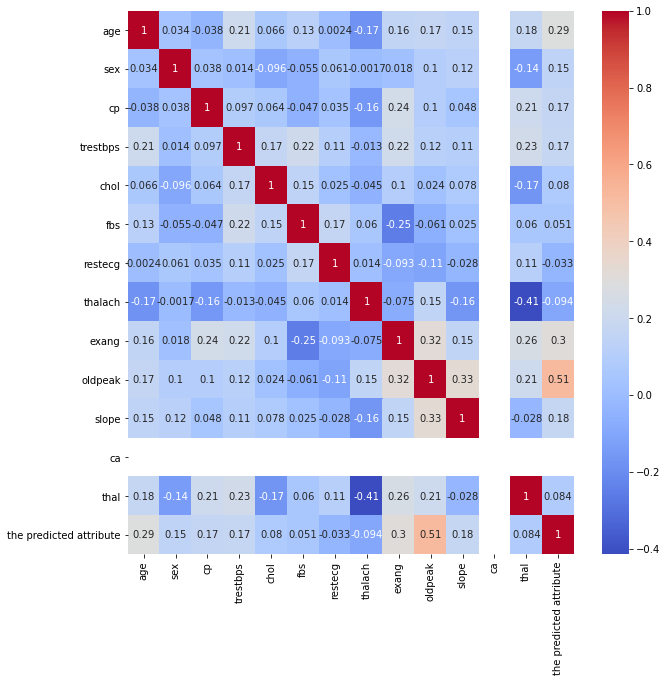

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

### "exang" have 30% correlation on "the predicted value" so as like previous method we will fill NaN values

In [13]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["exang"] = tpa_0["exang"].fillna(tpa_0["exang"].mean())
tpa_1["exang"] = tpa_1["exang"].fillna(tpa_1["exang"].mean())
tpa_2["exang"] = tpa_2["exang"].fillna(tpa_2["exang"].mean())
tpa_3["exang"] = tpa_3["exang"].fillna(tpa_3["exang"].mean())
tpa_4["exang"] = tpa_4["exang"].fillna(tpa_4["exang"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                    56
chol                         0
fbs                          0
restecg                      0
thalach                     53
exang                        0
oldpeak                      0
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

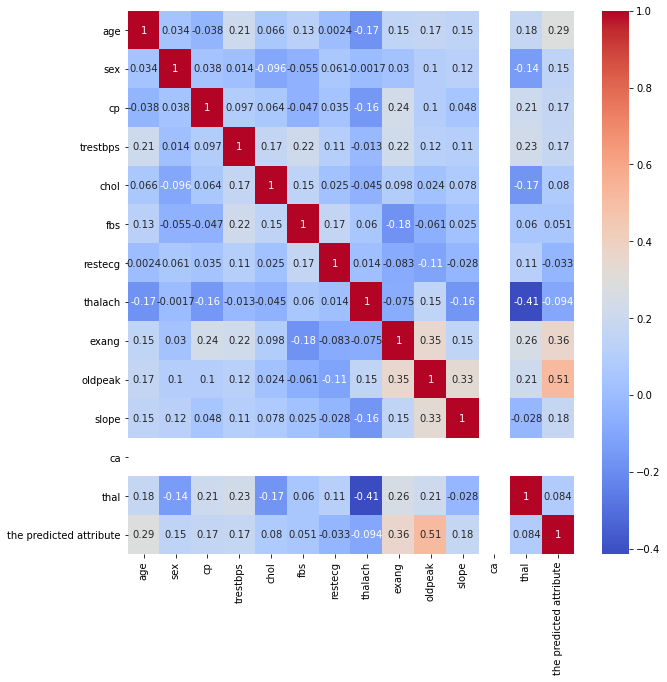

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

### We will further fill the NaN values with "the predicted value" so as like previous method we will fill NaN values

In [15]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["trestbps"] = tpa_0["trestbps"].fillna(tpa_0["trestbps"].mean())
tpa_1["trestbps"] = tpa_1["trestbps"].fillna(tpa_1["trestbps"].mean())
tpa_2["trestbps"] = tpa_2["trestbps"].fillna(tpa_2["trestbps"].mean())
tpa_3["trestbps"] = tpa_3["trestbps"].fillna(tpa_3["trestbps"].mean())
tpa_4["trestbps"] = tpa_4["trestbps"].fillna(tpa_4["trestbps"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                     53
exang                        0
oldpeak                      0
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

In [16]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["thalach"] = tpa_0["thalach"].fillna(tpa_0["thalach"].mean())
tpa_1["thalach"] = tpa_1["thalach"].fillna(tpa_1["thalach"].mean())
tpa_2["thalach"] = tpa_2["thalach"].fillna(tpa_2["thalach"].mean())
tpa_3["thalach"] = tpa_3["thalach"].fillna(tpa_3["thalach"].mean())
tpa_4["thalach"] = tpa_4["thalach"].fillna(tpa_4["thalach"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))
df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                      0
exang                        0
oldpeak                      0
slope                      102
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

In [17]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["slope"] = tpa_0["slope"].fillna(tpa_0["slope"].mean())
tpa_1["slope"] = tpa_1["slope"].fillna(tpa_1["slope"].mean())
tpa_2["slope"] = tpa_2["slope"].fillna(tpa_2["slope"].mean())
tpa_3["slope"] = tpa_3["slope"].fillna(tpa_3["slope"].mean())
tpa_4["slope"] = tpa_4["slope"].fillna(tpa_4["slope"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                         198
thal                       166
the predicted attribute      0
dtype: int64

In [18]:
tpa_0= df.loc[df['the predicted attribute']==0]
tpa_1= df.loc[df['the predicted attribute']==1]
tpa_2= df.loc[df['the predicted attribute']==2]
tpa_3= df.loc[df['the predicted attribute']==3]
tpa_4= df.loc[df['the predicted attribute']==4]

tpa_0["thal"] = tpa_0["thal"].fillna(tpa_0["thal"].mean())
tpa_1["thal"] = tpa_1["thal"].fillna(tpa_1["thal"].mean())
tpa_2["thal"] = tpa_2["thal"].fillna(tpa_2["thal"].mean())
tpa_3["thal"] = tpa_3["thal"].fillna(tpa_3["thal"].mean())
tpa_4["thal"] = tpa_4["thal"].fillna(tpa_4["thal"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2.append(
            tpa_3.append(
                tpa_4),ignore_index = True)))

df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                         198
thal                        10
the predicted attribute      0
dtype: int64

In [19]:
tpa_0= df.loc[df['restecg']==0]
tpa_1= df.loc[df['restecg']==1]
tpa_2= df.loc[df['restecg']==2]


tpa_0["thal"] = tpa_0["thal"].fillna(tpa_0["thal"].mean())
tpa_1["thal"] = tpa_1["thal"].fillna(tpa_1["thal"].mean())
tpa_2["thal"] = tpa_2["thal"].fillna(tpa_2["thal"].mean())

df=tpa_0.append(
    tpa_1.append(
        tpa_2), ignore_index= True)

df.isna().sum()

age                          0
sex                          0
cp                           0
trestbps                     0
chol                         0
fbs                          0
restecg                      0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                         198
thal                         0
the predicted attribute      0
dtype: int64

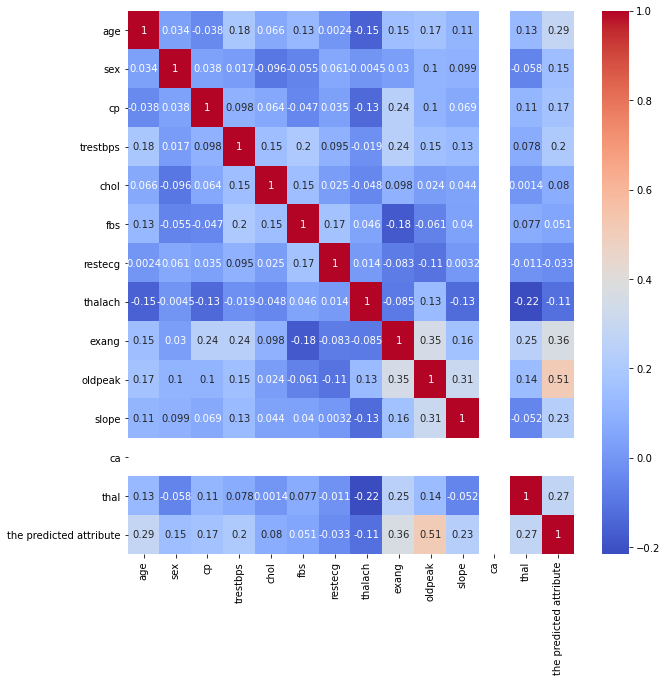

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

### From above we can conclude that the 'ca' column has no correlation and has nearly 99% missing values so we will remove the same

In [21]:
df.drop("ca",axis= 1, inplace = True)

In [22]:
df.isnull().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
thal                       0
the predicted attribute    0
dtype: int64

#### We have cleared all the null values in the data now we will continue with the Preprocessing Pipeline 


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      200 non-null    int64  
 1   sex                      200 non-null    int64  
 2   cp                       200 non-null    int64  
 3   trestbps                 200 non-null    float64
 4   chol                     200 non-null    float64
 5   fbs                      200 non-null    float64
 6   restecg                  200 non-null    int64  
 7   thalach                  200 non-null    float64
 8   exang                    200 non-null    float64
 9   oldpeak                  200 non-null    float64
 10  slope                    200 non-null    float64
 11  thal                     200 non-null    float64
 12  the predicted attribute  200 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.4 KB


In [24]:
des=pd.DataFrame(df.describe())
des.iloc[[1,5,6,7]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,the predicted attribute
mean,59.35,0.97,3.505,133.649265,178.740747,0.352435,0.735,122.842748,0.634406,1.283582,2.109652,6.290686,1.52
50%,60.00,1.00,4.000,131.209302,214.000000,0.000000,1.000,123.470588,0.800000,1.019048,2.000000,6.600000,1.00
75%,64.00,1.00,4.000,140.000000,254.500000,1.000000,1.000,130.000000,1.000000,2.000000,2.043478,6.666667,3.00
max,77.00,1.00,4.000,190.000000,458.000000,1.000000,2.000,180.000000,1.000000,4.000000,3.000000,7.000000,4.00


### Key Observation: 
    The Difference between the mean and median(50%) is near which means data has less skewness and outliers.
    But let visualize the same in following steps. 

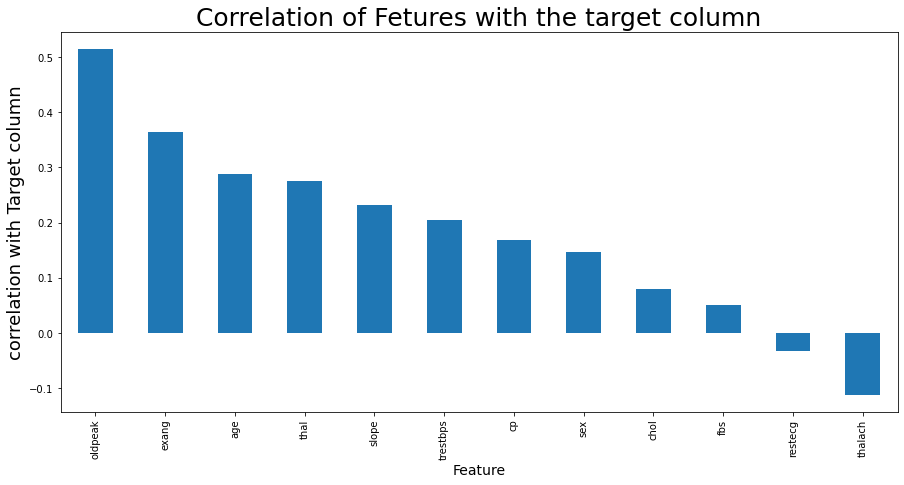

In [25]:
plt.figure(figsize=(15,7))
df.corr()["the predicted attribute"].sort_values(ascending=False).drop(["the predicted attribute"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key Observations:

#### The correlation with the Target Variable is:
    oldpeak     0.514634
    exang       0.364374
    age         0.287289
    thal        0.274930
    slope       0.231266
    trestbps    0.203937
    cp          0.168210
    sex         0.147470
    chol        0.080084
    fbs         0.051016
    restecg    -0.032800
    thalach    -0.111939

# Skewness Identification:

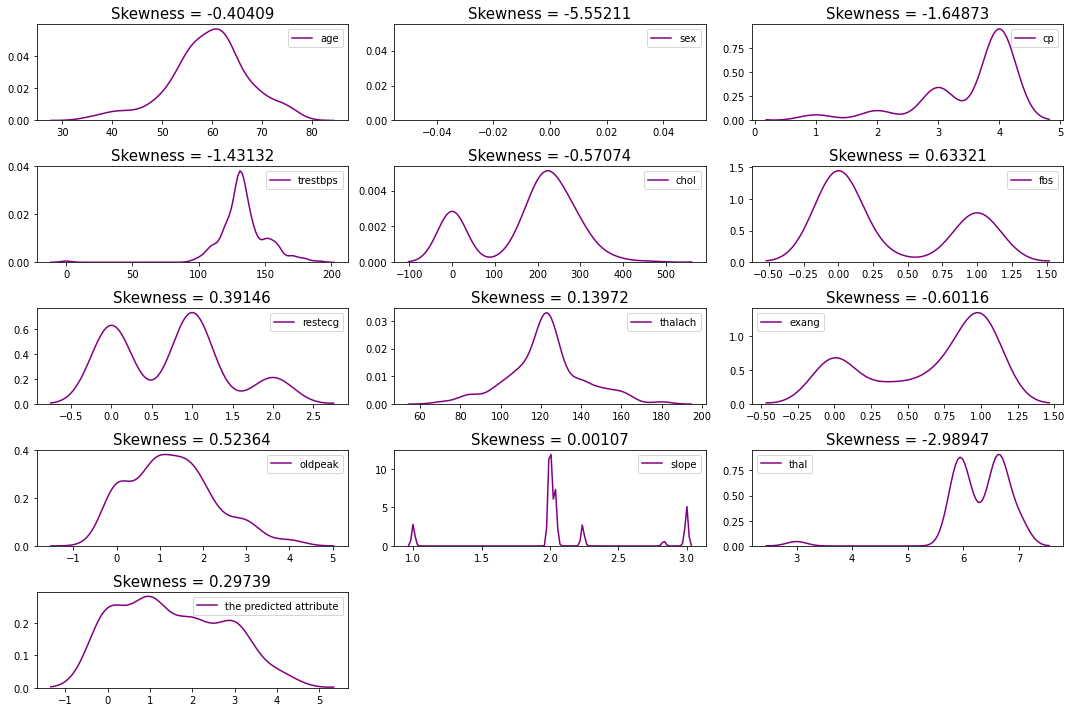

In [26]:
plt.figure(figsize=(15,10))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(5,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

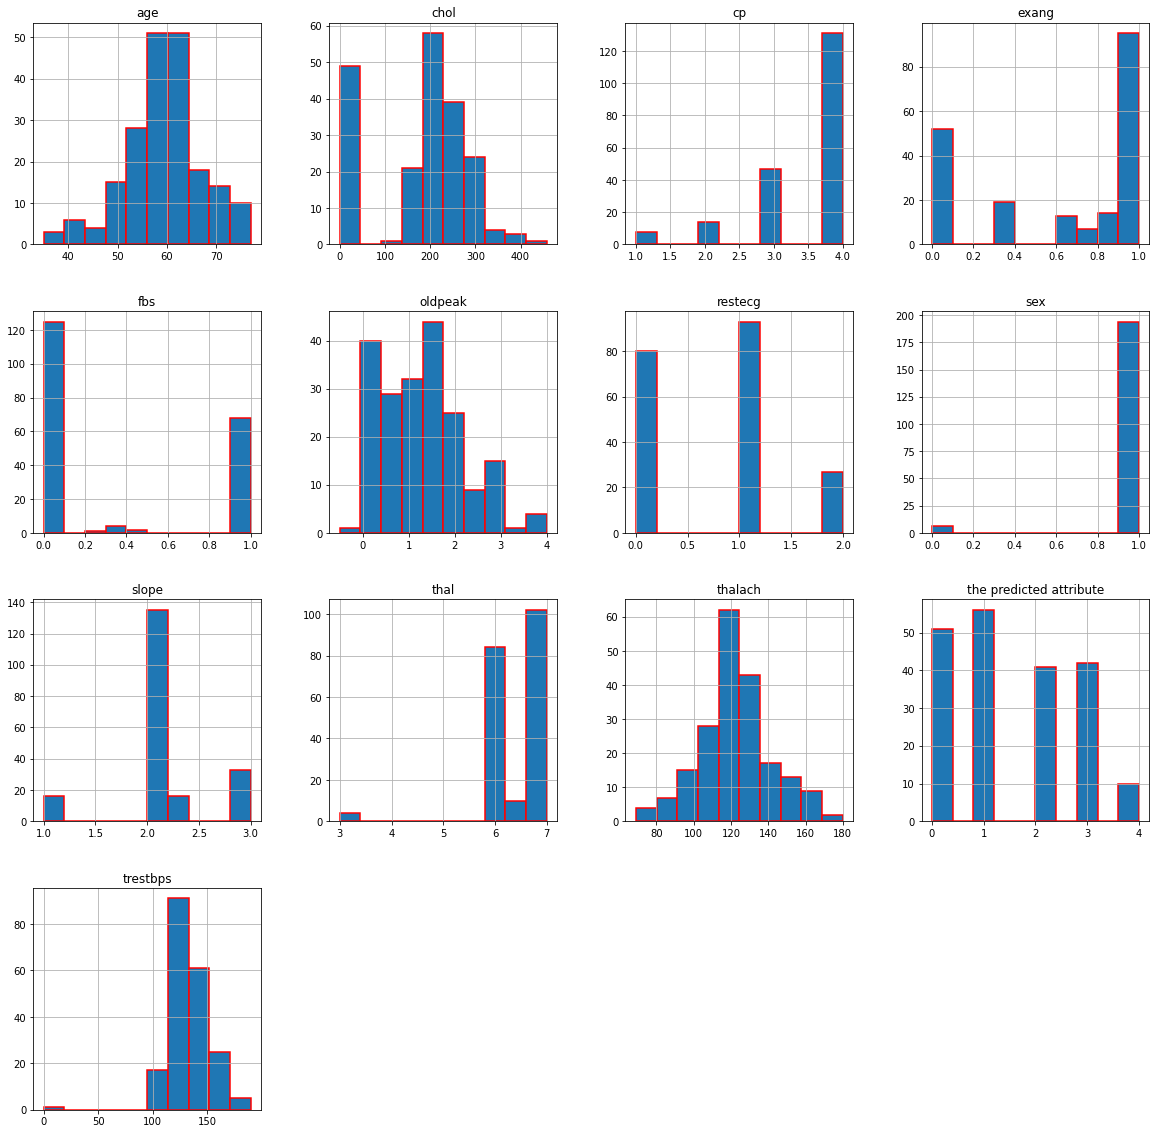

In [27]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [28]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,fbs,0.633207
1,oldpeak,0.523641
2,restecg,0.391463
3,the predicted attribute,0.297393
4,thalach,0.139718
5,slope,0.001068
6,age,-0.404091
7,chol,-0.570738
8,exang,-0.601159
9,trestbps,-1.431317


In [29]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['fbs', 'oldpeak'] 

negative Skewed data:
 ['chol', 'exang', 'trestbps', 'cp', 'thal', 'sex']


# Lets Identify the outliers and remove them.

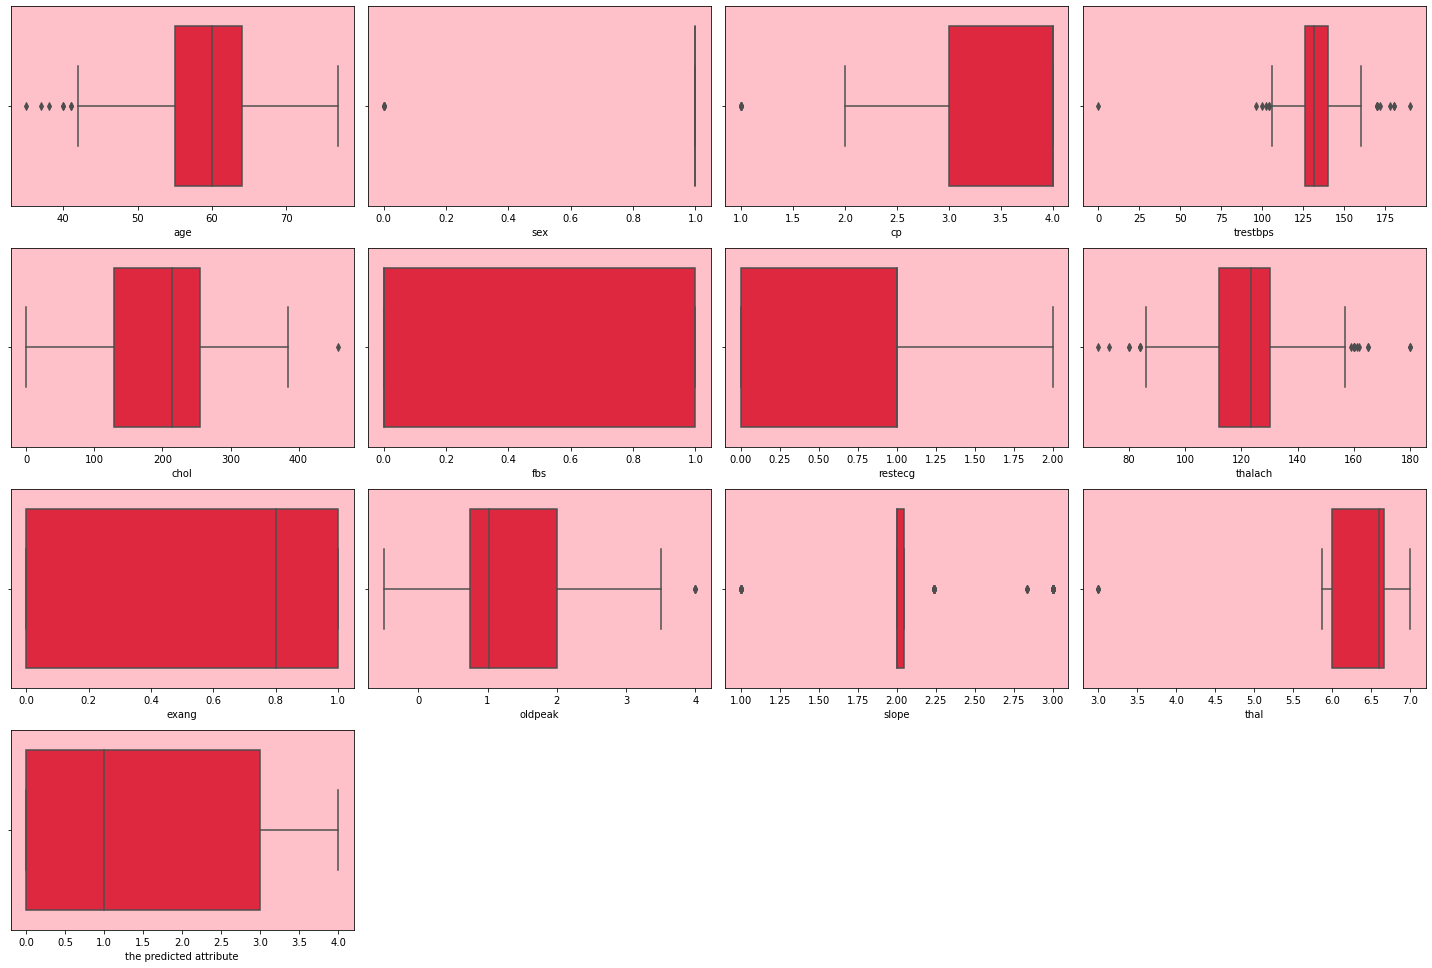

In [30]:
plt.figure(figsize=(20,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#fb0a29" , orient = "h")
    ax.set_facecolor("#fec1c9")
    plt.tight_layout()

# Outliers Removal by Z-Score method

In [31]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]


In [32]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((200-189)/200)*100}%")

Orginal Data (200, 13)
After Removing outliers (177, 13)
The percentage of data loss 5.5%


In [33]:
df1=df_new

# Skewness Removal

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


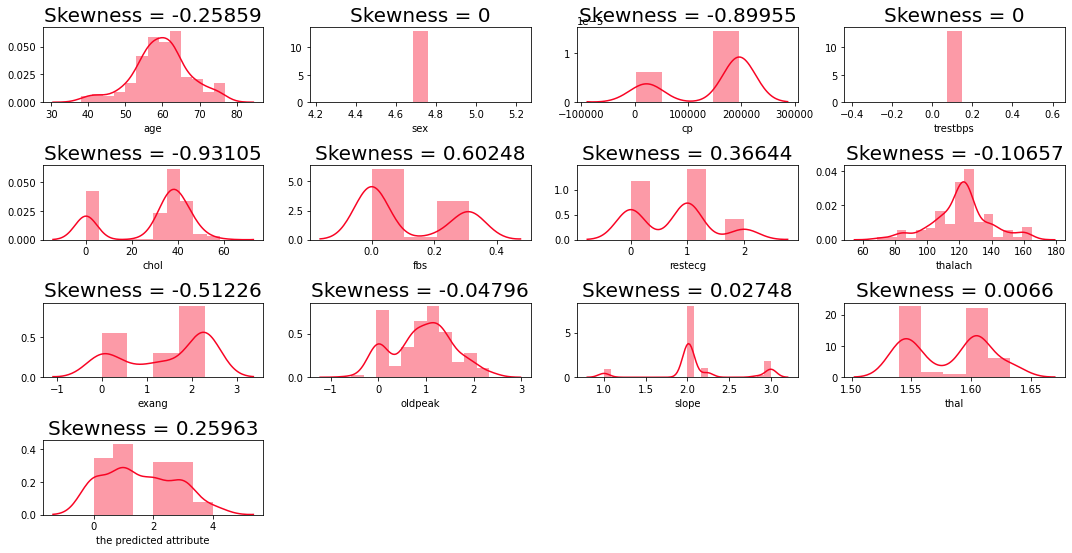

In [34]:
DF=df1

from scipy.stats import yeojohnson

for i in skew_postive_row:
    DF[i]= yeojohnson(DF[i])[0]
for i in skew_negative_row:
    DF[i]= yeojohnson(DF[i])[0]   
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(15,15))
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = "#f80424")
    plt.tight_layout()  

In [35]:
df=DF

### We have removed the skewness of the data by "yeojohnson" method. Lets see the relationship of the data with the target variable.

In [36]:
orange ="#60010d"
green ="#980216"
grey ="#fc6a7d"
yellow ="#fecad1"
blue ="#fc8292"

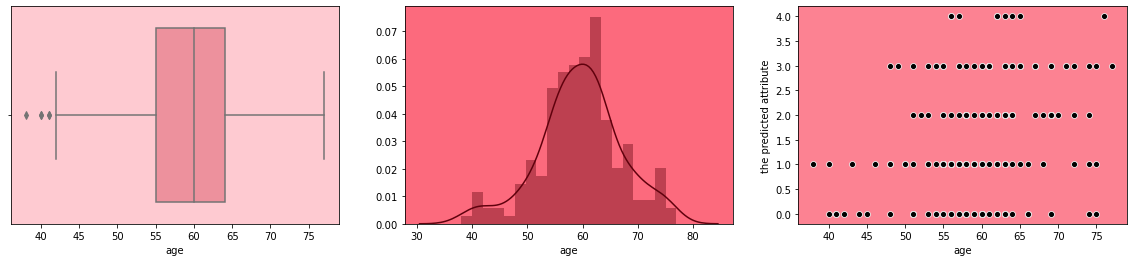

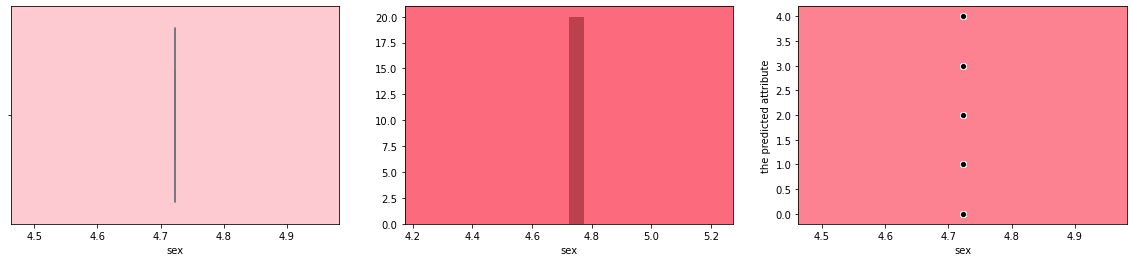

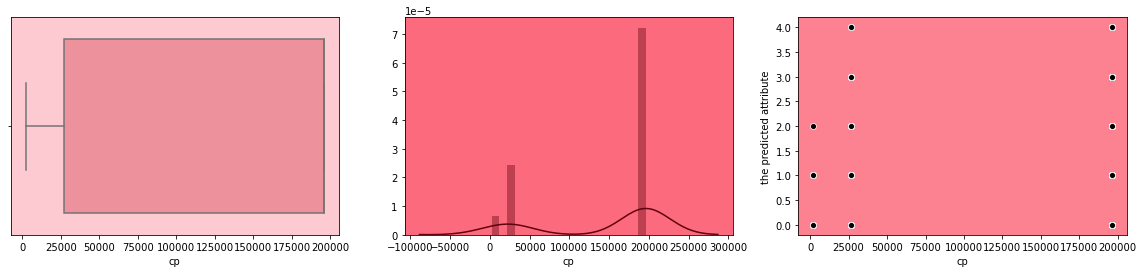

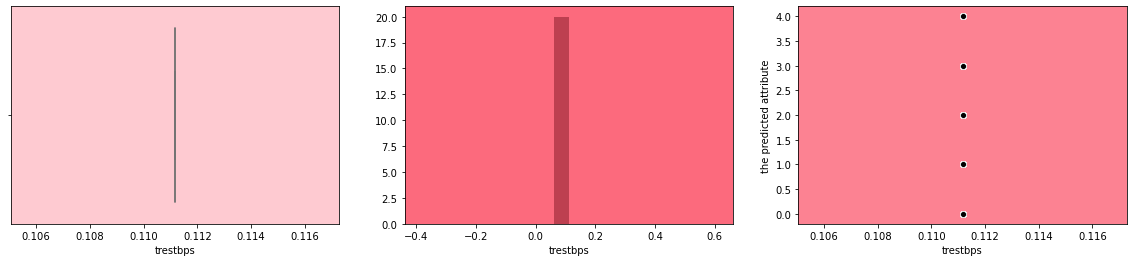

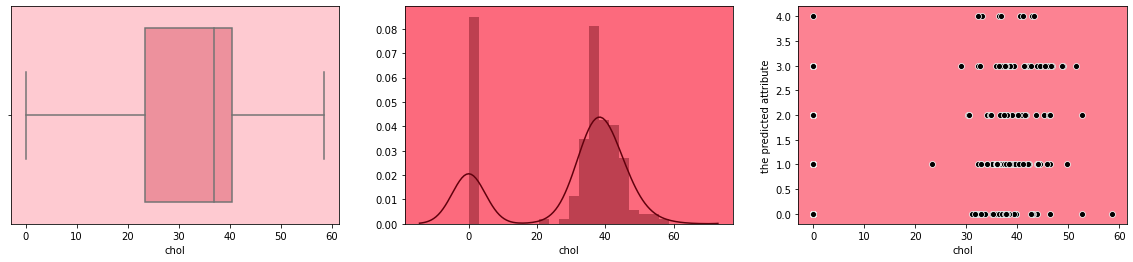

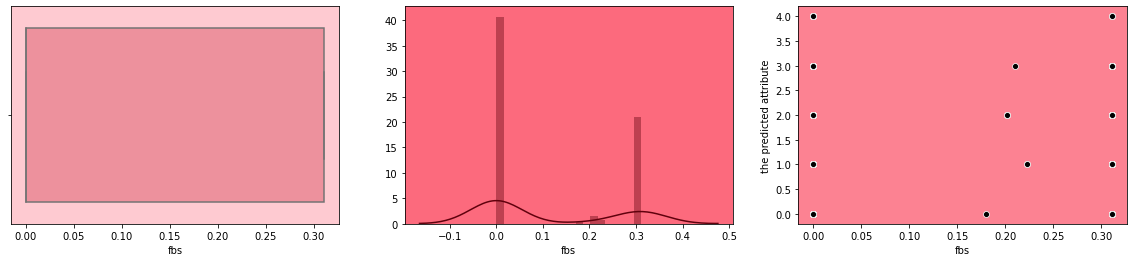

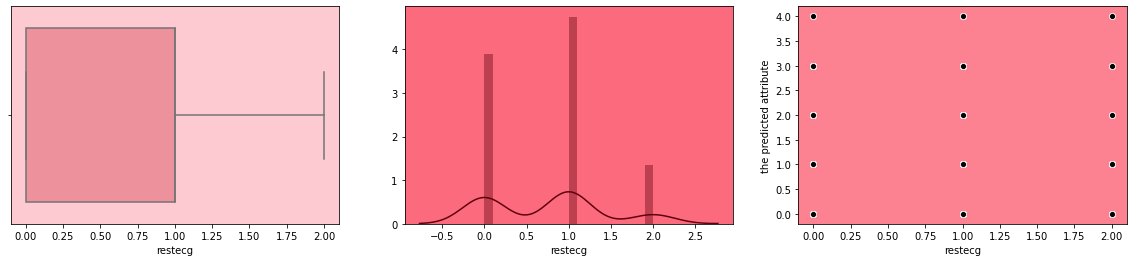

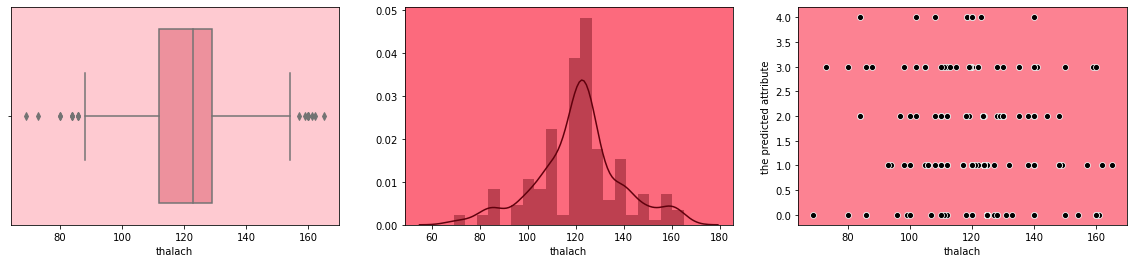

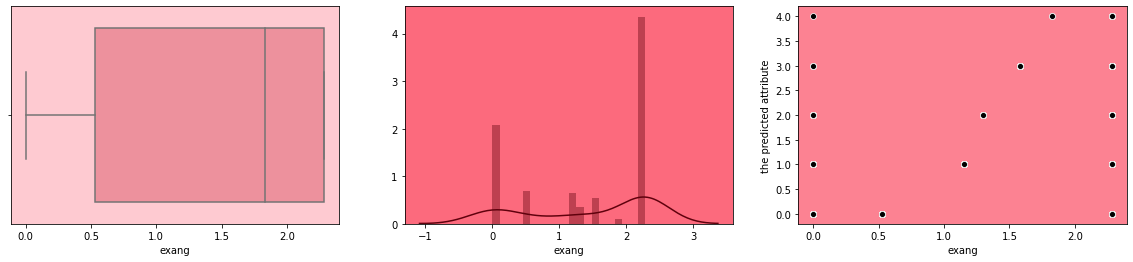

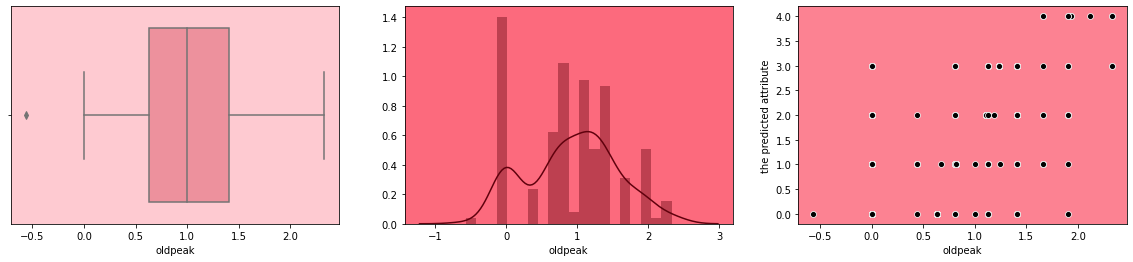

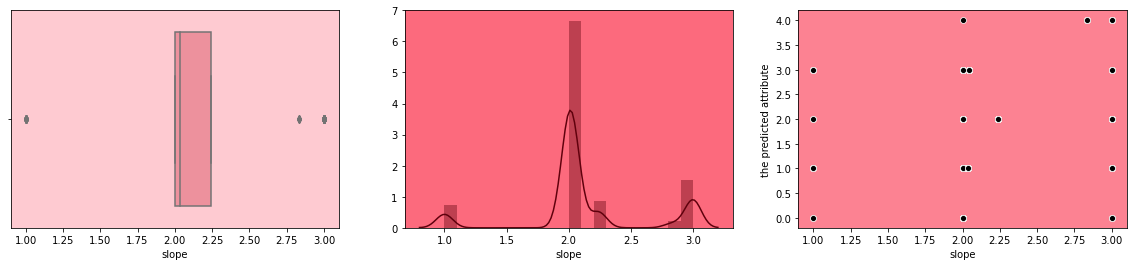

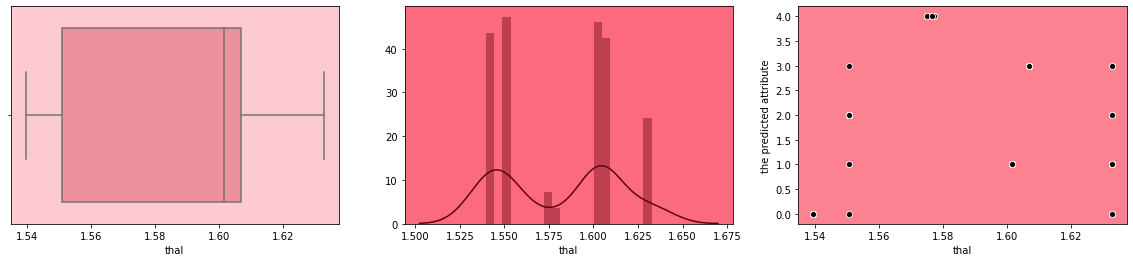

In [37]:
target_variable_1 = "the predicted attribute"
feature_variable = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal']


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=blue)
    a1.set_facecolor(yellow)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=orange)
    a2.set_facecolor(grey)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="k")
    a3.set_facecolor(blue)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

### The above observation will tell us the relationship between the feature variable and how it is scattered in target variable 

##### Scaling the DataSet Before proceeding for training

In [38]:
x=df.drop(["the predicted attribute"], axis = 1)
y=df['the predicted attribute']
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,4))

x=sc.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = GaussianNB()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = accuracy_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}") 

Best Accuracy 84.44444444444444 found on randomstate 543


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

## Lets shortlist promising Classification models.

In [42]:
def evaluate_model(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(), \
                                scores['test_accuracy'].std()
    
    precision, precision_std = scores['test_precision'].mean(), \
                                scores['test_precision'].std()
    
    recall, recall_std = scores['test_recall'].mean(), \
                                scores['test_recall'].std()
    
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [43]:
models_2 = [GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier(silent=True)]

model_names_2 = ["Naive Bayes Gaussian", "K Neighbors Classifier", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [44]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models_2)):
    print(f"\n\nStep {model+1} of {len(models_2)}")
    print(f"............................................................running {model_names_2[model]}")
    
    clf_scores = evaluate_model(models_2[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 8
............................................................running Naive Bayes Gaussian
Accuracy: 0.743019943019943 - (std: 0.0830942341438718)
Precision: 0.7387853298964411 - (std: 0.09093093866910679)
Recall: 0.743019943019943 - (std: 0.0830942341438718)
f1: 0.7342157289668602 - (std: 0.08217357077057522)


Step 2 of 8
............................................................running K Neighbors Classifier
Accuracy: 0.5843304843304843 - (std: 0.09076388314245225)
Precision: 0.5755207344096233 - (std: 0.1042710076382962)
Recall: 0.5843304843304843 - (std: 0.09076388314245225)
f1: 0.5654029968132532 - (std: 0.09459985293842237)


Step 3 of 8
............................................................running Random Forest
Accuracy: 0.8709401709401708 - (std: 0.039400792683693245)
Precision: 0.8862345679012347 - (std: 0.034596157525514475)
Recall: 0.8709401709401708 - (std: 0.039400792683693245)
f1: 0.8708977442310774 - (std: 0.03756124627258919)


Step 4 of 8
.........

In [45]:
mean_score= []
STD=[]
for m in models_2:
    CV=cross_val_score(m,x,y,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF GaussianNB() IS:
SCORE IS: [0.12550607 0.03317536 0.07894737 0.32768362 0.03107345]
MEAN OF SCORE is : 0.1192771717785353
Standard Deviation : 0.10981070815165175
**************************************************************************************************



SCORE OF KNeighborsClassifier() IS:
SCORE IS: [ 0.08906883 -0.13744076 -0.17809058  0.05084746 -0.56214689]
MEAN OF SCORE is : -0.14755238853731073
Standard Deviation : 0.2316357169546002
**************************************************************************************************



SCORE OF RandomForestClassifier(random_state=42) IS:
SCORE IS: [0.70850202 0.73459716 0.7001224  0.88135593 0.88135593]
MEAN OF SCORE is : 0.7811866888234379
Standard Deviation : 0.08257459501512646
**************************************************************************************************



SCORE OF DecisionTreeClassifier(random_state=42) IS:
SCORE IS: [0.76315789 0.96208531 0.76438188 0.84180791 0.78248588]
MEAN OF SCORE i

In [46]:
classification_result = pd.DataFrame({"Model": model_names_2,
                                      "CV_mean_score":mean_score,
                                      "CV_STD":STD,
                                      "accuracy": accuracy,
                                      "precision": precision,
                                      "recall": recall,
                                      "f1": f1})
classification_result.sort_values(by="f1", ascending=False)

,Model,CV_mean_score,CV_STD,accuracy,precision,recall,f1
7,XGBoost,0.790454,0.052351,0.924217,0.930671,0.924217,0.923528
6,Gradient Boosting,0.815481,0.077142,0.909402,0.923590,0.909402,0.910377
3,Decision Tree,0.822784,0.075308,0.909117,0.917023,0.909117,0.909356
2,Random Forest,0.781187,0.082575,0.870940,0.886235,0.870940,0.870898
4,Extra Tree,0.356622,0.163855,0.818234,0.842779,0.818234,0.820037
0,Naive Bayes Gaussian,0.119277,0.109811,0.743020,0.738785,0.743020,0.734216
5,Ada Boost,0.455480,0.304150,0.696296,0.568084,0.696296,0.609597
1,K Neighbors Classifier,-0.147552,0.231636,0.584330,0.575521,0.584330,0.565403


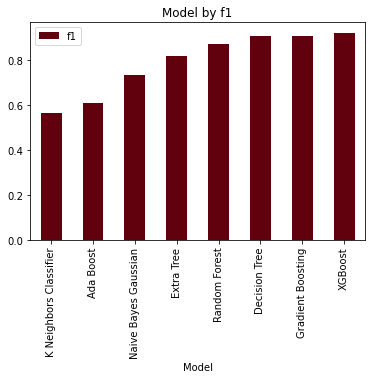

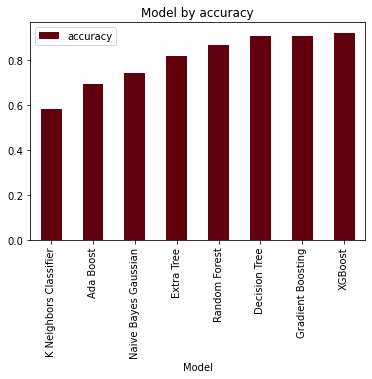

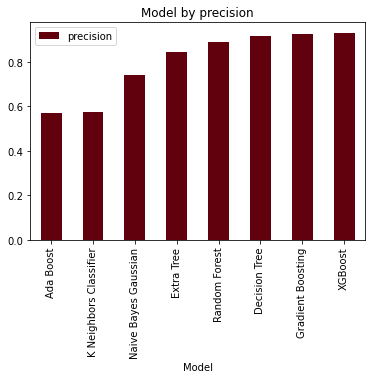

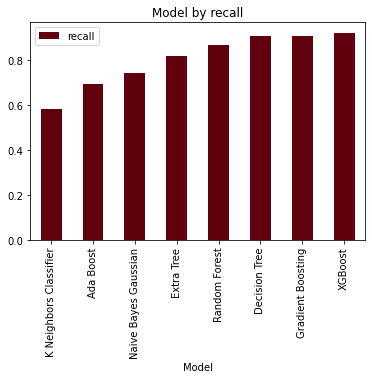

In [47]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    classification_result.sort_values(by=metric).plot.bar("Model", metric, color = orange)
    plt.title(f"Model by {metric}")
    plt.show()

## Key Observation:
     Among our model we have XGB tops the chart. Lets hypertune XGBost.
     XGB-F1score = 0.923528

In [48]:
clf_xgb =  xgb.XGBClassifier(silent=True)
preds = cross_val_predict(clf_xgb, x_train, y_train, cv=5, n_jobs=-1)

In [49]:
clf_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'silent': True}

In [50]:
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,0,1,2,3,4
Real,,,,,
0,28,4,0,0,0
1,1,34,1,2,0
2,0,0,24,0,0
3,0,1,1,28,0
4,0,0,0,0,8


In [51]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.87      0.89      0.88        38
           2       0.92      1.00      0.96        24
           3       0.93      0.93      0.93        30
           4       1.00      1.00      1.00         8

    accuracy                           0.92       132
   macro avg       0.94      0.94      0.94       132
weighted avg       0.93      0.92      0.92       132



# HYPER TUNING....


In [52]:
param_grid = [
    {'learning_rate' : [1e-3, 1e-1, 'log-uniform'],
     'n_estimators': [100, 2000],
     'max_depth': [1, 10],
     'min_child_weight': [1, 6.],
     'gamma': [0, 0.5], 
     'subsample':[0.5, 1.], 
     'colsample_bytree': [0.5, 1.] 
    }
]


clf_xgb =  xgb.XGBClassifier(silent=True)

In [53]:
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [54]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 582 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  8.8min finished


[02:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, silent=True,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbos

In [55]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.5,
 'learning_rate': 0.001,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 2000,
 'subsample': 1.0}

In [56]:
grid_search.best_score_

0.9393239178005391

In [57]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
preds

array([3, 4, 3, 2, 2, 3, 1, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 3, 3,
       3, 2, 1, 0, 2, 0, 3, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1,
       0, 1, 2, 1, 3, 4, 4, 3, 3, 0, 0, 3, 1, 0, 1, 1, 3, 3, 0, 3, 1, 4,
       2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 1, 2, 1, 1, 3, 2, 4, 2, 3, 2, 0, 1,
       2, 0, 1, 2, 0, 2, 0, 0, 3, 4, 3, 2, 1, 1, 0, 2, 4, 2, 4, 1, 3, 3,
       2, 3, 0, 2, 3, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 3, 2, 1],
      dtype=int64)

In [58]:
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4
Actual,,,,,
0,28,3,1,0,0
1,0,36,2,0,0
2,0,0,24,0,0
3,1,0,1,28,0
4,0,0,0,0,8


In [59]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        32
           1       0.92      0.95      0.94        38
           2       0.86      1.00      0.92        24
           3       1.00      0.93      0.97        30
           4       1.00      1.00      1.00         8

    accuracy                           0.94       132
   macro avg       0.95      0.95      0.95       132
weighted avg       0.94      0.94      0.94       132



In [60]:
y_pred = final_model.predict(x_test)

pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1,2,3,4
Actual,,,,,
0,8,1,0,0,0
1,0,13,0,0,0
2,2,1,11,0,0
3,0,1,0,7,0
4,0,0,0,0,1


In [61]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.81      1.00      0.90        13
           2       1.00      0.79      0.88        14
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         1

    accuracy                           0.89        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.89      0.89        45



In [62]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

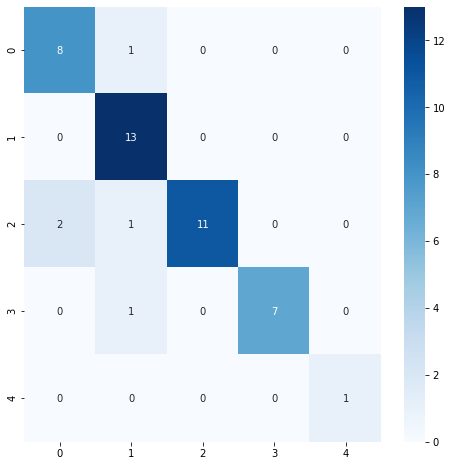

In [63]:
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")

## We have hypertuned the XGB Classifier and have improved the F1 score from .92 to .95. And also lets see the what causes the heart disease by seeing the feature importance below.

# Summary:
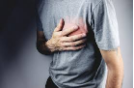

>We started our analysis with EDA Pipeline. We identified the ‘NaN’ values in the dataset 

                                   age                          0
                                   sex                          0
                                   cp                           0
                                   trestbps                    56
                                   chol                         7
                                   fbs                          7
                                   restecg                      0
                                   thalach                     53
                                   exang                       53
                                   oldpeak                     56
                                   slope                      102
                                   ca                         198
                                   thal                       166
                                   the predicted attribute      0


>We saw since there is more NaN values in the data set according to the correlation the dataset has with target variable we divided the dataset into 5 category and we filled the missing values with average of the missing parameters. Post filling the missing values we also removed the Column that has no correlation with the dataset.
>Further in the EDA Pipeline we identified Outliers and skewness in the dataset with “Yeo-Johnson” method we have removed skewness and using Z-Score we have removed outliers. We Visualize the relationship of each feature variable with Target variable

### Shortlisting the models:

>We trained or data with nine Classification Models and we shortlisted XGBoost model by analyzing performance Vs Errors in the model. Further we hyper tuned the model which increased the performance of the model from 92% - 95%. The best parameter for the model is

                                           {'colsample_bytree': 0.5,
                                            'gamma': 0.5,
                                            'learning_rate': 0.001,
                                            'max_depth': 10,
                                            'min_child_weight': 1,
                                            'n_estimators': 2000,
                                            'subsample': 1.0}

>We are saving the model in .obj format for further use in thedevelopement.


# Saving our model

In [64]:
import joblib
joblib.dump(final_model,"heart_disease.obj")

['heart_disease.obj']

## As per our study lets find out what are the factors that causes Heart Disease

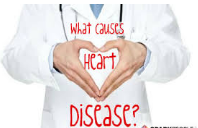    

# Feature importances


In [65]:
feature_importances = final_model.feature_importances_
feature_importances

array([0.0430871 , 0.        , 0.03804522, 0.        , 0.04061561,
       0.0404028 , 0.03483308, 0.05363889, 0.10531057, 0.09649053,
       0.1519093 , 0.39566687], dtype=float32)

In [66]:
selector = RFECV(final_model, step=1, cv=StratifiedKFold())
selector = selector.fit(x_train, y_train)

[02:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but sli

[02:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


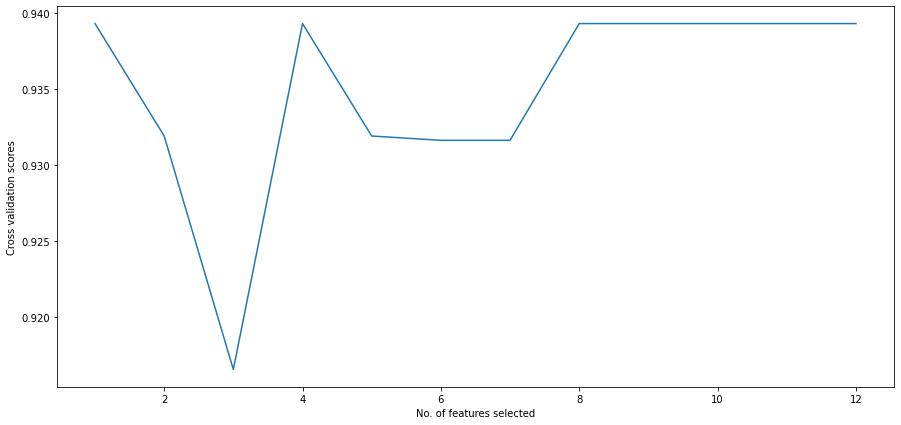

In [67]:
plt.figure(figsize=(15,7))
plt.xlabel("No. of features selected")
plt.ylabel("Cross validation scores")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [68]:
imp=selector.grid_scores_
importance =[]
for i in imp:
    importance.append(round(i,2))

feature_variable=["age", 'sex', "chest pain", "resting blood pressure", "cholestoral", "fasting blood sugar",
                  "resting electrocardiographic"," maximum heart rate achieved", "exercise induced angina", 
                  "oldpeak", "the slope of the peak exercise ST segment", "thal"]

sel = pd.DataFrame({"Feature_Variables": feature_variable,
                   "Importance":importance})
sel.sort_values(by="Importance", ascending=False)

,Feature_Variables,Importance
0,age,0.94
3,resting blood pressure,0.94
7,maximum heart rate achieved,0.94
8,exercise induced angina,0.94
9,oldpeak,0.94
10,the slope of the peak exercise ST segment,0.94
11,thal,0.94
1,sex,0.93
4,cholestoral,0.93
5,fasting blood sugar,0.93


# Conclusion: 
> Heart disease is the leading cause of the death in the United States as like said before. It is also a major cause of disability. There are many things that can raise your risk for heart disease. They are called risk factors. Some of them you cannot control, but there are many that you can control. Learning about them can lower your risk of heart disease.
>Our study analysis 13 factors with 200 records of different patients which caused the “Heart-Disease”. From which we figured the following 5 have more risk in causing heart disease.


                                         1	Age              94%
                                         2	Blood pressure   94%
                                         3	Cholestoral	  93%
                                         4	Blood Sugar	  93%
                                         5	Chestpain	    92%

# 6 Risk factors as per picture taken from internet.
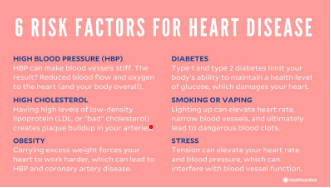

# As suggested on internet Factors that could reduce risk of heart disease:
       
1.	Control your blood pressure. High blood pressure is a major risk factor for heart disease. ...
2.	Keep your cholesterol and triglyceride levels under control. ...
3.	Stay at a healthy weight. ...
4.	Eat a healthy diet. ...
5.	Get regular exercise. ...
6.	Limit alcohol. ...
7.	Don't smoke. ...
8.	Manage stress.


                                                              -Picture and Data courtesy Google.    |     www.google.co.in